In [122]:
import skfuzzy
import numpy as np
import matplotlib.pyplot as plt
from utils.datastore import *
from sklearn.metrics import f1_score, adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay

In [57]:
ds = DataStore()
D = ds.build_datasets()
L = D[0]['label']

In [17]:
# Hyperparameters:
metric = 'cityblock'
c = 7
epsilon = 1e-06
T = 100
m_list = [1.1,1.6,2.0]
niter = 50

all_results = {}

for i,Di in enumerate(D,start=1):
    Di = Di.drop(columns=['label'],axis=1)
    all_results[str(i)] = {}
    for m in m_list:
        results = []
        for j in range(niter):
            results.append(
                skfuzzy.cmeans(Di.transpose(), c, m, error=epsilon, metric=metric, 
                        maxiter=T, init=None)
            )
        all_results[str(i)][str(m)] = results 

In [129]:
best_results = {}

for dataset,mresults in all_results.items():
    best_results[dataset] = {}
    for m,results in mresults.items():
        results.sort(key=lambda r: r[4][-1])
        best_results[dataset][m] = results[0]
        print("Dataset: {0} --- m: {1} --- J: {2}".format(dataset,m,results[0][4][-1]))
    print("\n")
best_results

Dataset: 1 --- m: 1.1 --- J: 168177.68120070425
Dataset: 1 --- m: 1.6 --- J: 148192.60880252608
Dataset: 1 --- m: 2.0 --- J: 109620.79330955156


Dataset: 2 --- m: 1.1 --- J: 3083889.429402582
Dataset: 2 --- m: 1.6 --- J: 2744887.383072828
Dataset: 2 --- m: 2.0 --- J: 2106153.3041359084


Dataset: 3 --- m: 1.1 --- J: 13623060.345228085
Dataset: 3 --- m: 1.6 --- J: 10983111.670301195
Dataset: 3 --- m: 2.0 --- J: 6997221.0043995995




{'1': {'1.1': (array([[3.98683957e-17, 4.44445034e-02, 1.88111091e+01, 3.75060021e+02,
           2.20000041e+01],
          [1.47599910e-02, 3.63171373e-03, 1.54695120e+00, 1.33436557e+00,
           2.08579445e+00],
          [6.64363685e-17, 7.40619580e-02, 2.32779879e+01, 5.58869266e+02,
           4.13464567e+01],
          [1.97175442e-03, 2.95180606e-02, 9.16361222e+00, 1.93908754e+01,
           9.63115989e+00],
          [2.49177139e-17, 4.16666663e-02, 1.56666668e+01, 2.14176867e+02,
           1.28888897e+01],
          [4.98488556e-17, 5.55705201e-02, 2.50417982e+01, 7.95477946e+02,
           1.60715285e+01],
          [2.38757456e-17, 3.70227349e-02, 8.86883834e+00, 8.89132092e+01,
           7.40643943e+00]]),
   array([[4.30986630e-41, 2.70298373e-41, 1.46304375e-41, ...,
           1.41521187e-44, 1.92067698e-42, 9.86012825e-49],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
           1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.2878

In [33]:
best_m_results = [ best_results[i]['2.0'] for i in best_results.keys()]

[(array([[1.37518535e-05, 2.90555077e-02, 8.73508249e+00, 7.78816445e+01,
          7.25993119e+00],
         [3.41311982e-07, 4.68429053e-02, 1.64042384e+01, 2.07286321e+02,
          1.34144048e+01],
         [5.08875460e-08, 5.28173198e-02, 1.85856507e+01, 3.70805307e+02,
          2.20435332e+01],
         [4.31154966e-09, 5.51750487e-02, 2.63543622e+01, 7.76000705e+02,
          1.67201785e+01],
         [1.14169186e-08, 7.66226959e-02, 2.34192794e+01, 5.65382268e+02,
          4.06212356e+01],
         [1.52371609e-02, 2.12087780e-03, 1.28275393e+00, 9.73899009e-01,
          1.61625019e+00],
         [9.21738211e-03, 1.86102269e-02, 4.37271434e+00, 6.53121650e+00,
          6.32380979e+00]]),
  array([[9.32536371e-04, 8.76803415e-04, 8.07653197e-04, ...,
          9.24759111e-04, 6.09745734e-04, 3.97292974e-04],
         [1.44319892e-04, 1.35530528e-04, 1.24648220e-04, ...,
          1.37702100e-04, 9.36521936e-05, 5.81146817e-05],
         [4.77636718e-05, 4.48398291e-05, 4.122

In [35]:
# Modified Partition Coefficient
def modified_partition_coefficient(ncenters, partition_coefficient):
    return 1 - (ncenters/(ncenters+1))*(1-partition_coefficient)

# Partition Entropy
def partition_entropy(U):
    C, N = U.shape
    s = 0
    for i in range(C):
        for j in range(N):
            s += U[i][j] * np.log(U[i][j])
    return -(1/N)*s
    
for i in range(3):
    print("Partition Entropy D{0}: {1}".format(i+1,partition_entropy(best_m_results[i][1])))
    print("Modified Partition Coefficient D{0}: {1}\n".format(i+1,modified_partition_coefficient(7,best_m_results[i][-1])))

Partition Entropy D1: 0.23285060903173463
Modified Partition Coefficient D1: 0.8860204043331151

Partition Entropy D2: 0.5992513523851162
Modified Partition Coefficient D2: 0.7533267884763291

Partition Entropy D3: 0.6925179194718304
Modified Partition Coefficient D3: 0.71287032472007



In [107]:
# Crisp partitions

def build_crisp_partition(U):
    C = []
    M,N = U.shape
    for j in range(N):
        cut_value = np.sort(U[:,j])[-2]
        C.append(skfuzzy.lambda_cut(U[:,j],cut_value))
    return pd.DataFrame(C,columns=pd.unique(L),dtype=float)

C1 = build_crisp_partition(best_m_results[0][1])
C2 = build_crisp_partition(best_m_results[1][1])
C3 = build_crisp_partition(best_m_results[2][1])

L1 = pd.from_dummies(C1)
L2 = pd.from_dummies(C2)
L3 = pd.from_dummies(C3)

In [108]:
# Adjusted Rand Index
L1.to_numpy().flatten()
ARI = [
    adjusted_rand_score(L.to_numpy().flatten(), L1.to_numpy().flatten()),
    adjusted_rand_score(L.to_numpy().flatten(), L2.to_numpy().flatten()),
    adjusted_rand_score(L.to_numpy().flatten(), L3.to_numpy().flatten())
]

for i in range(3):
    print("ARI{}: {}\n".format(i+1,ARI[i]))

ARI1: 0.005842147571442811

ARI2: 0.3933554483203685

ARI3: 0.43260979065948185



Dataset: 1

	m: 1.1
	J: 12.888889708583392
	MPF: 0.9982036331219866
	PE: 0.003618322724173282
	ARI: 0.0012965035336477357
	F-M: 0.14818024263431542

	m: 1.6
	J: 17.027641475583195
	MPF: 0.9671614086590777
	PE: 0.06669090967642502
	ARI: 0.0020587402223634014
	F-M: 0.13734835355285963

	m: 2.0
	J: 40.62123563681393
	MPF: 0.8860204043331151
	PE: 0.23285060903173463
	ARI: 0.005842147571442811
	F-M: 0.1169844020797227



Dataset: 2

	m: 1.1
	J: 0.16591119090227163
	MPF: 0.988614993673945
	PE: 0.021760110046635882
	ARI: 0.3776977457745582
	F-M: 0.19280762564991336

	m: 1.6
	J: 0.16607954032103261
	MPF: 0.8909261681693332
	PE: 0.2504813827114056
	ARI: 0.39016086570457853
	F-M: 0.15641247833622185

	m: 2.0
	J: 0.2574916934605112
	MPF: 0.7533267884763291
	PE: 0.5992513523851162
	ARI: 0.3933554483203685
	F-M: 0.02902946273830156



Dataset: 3

	m: 1.1
	J: 0.3798705127212251
	MPF: 0.984625650931866
	PE: 0.029664251640066936
	ARI: 0.3655766736821893
	F-M: 0.2378682842287695

	m: 1.6
	J: 0.29916058

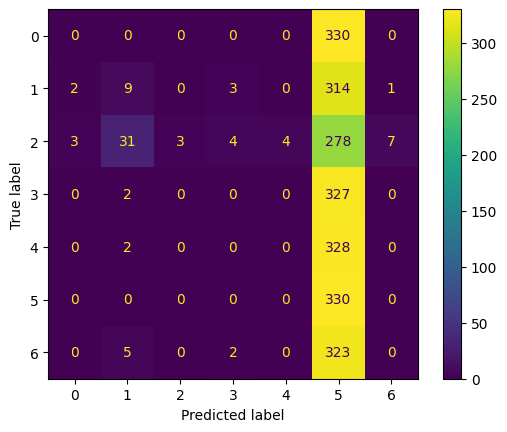

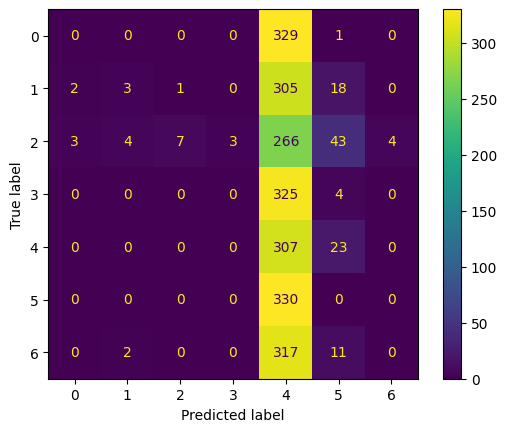

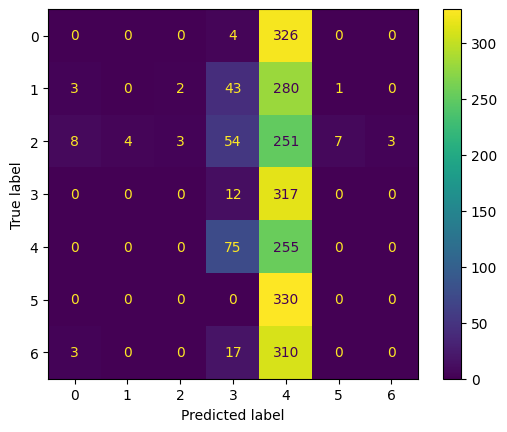

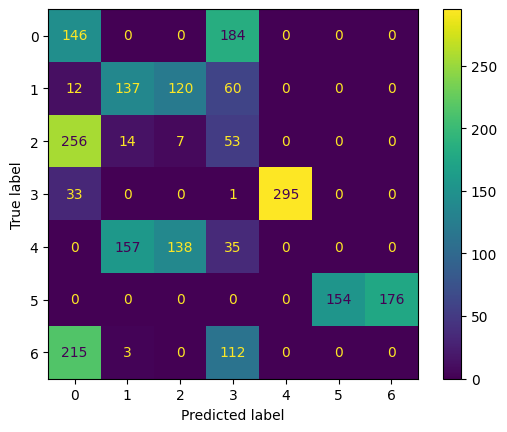

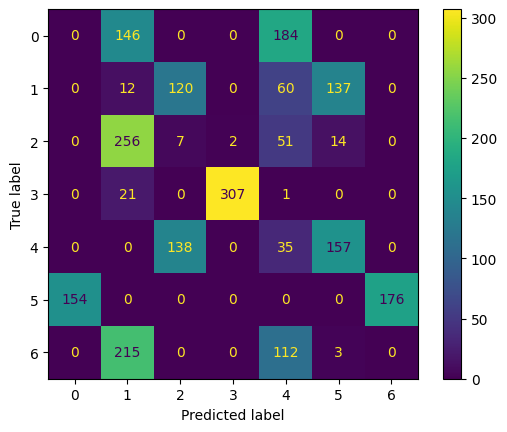

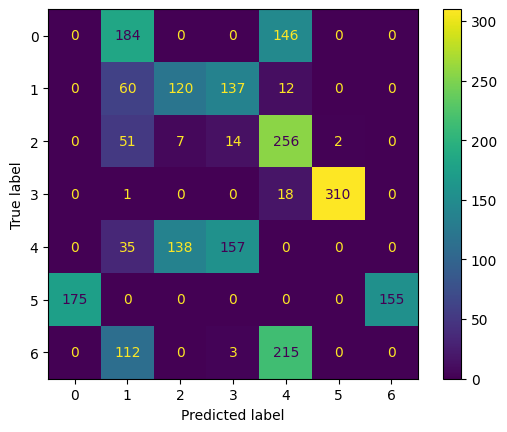

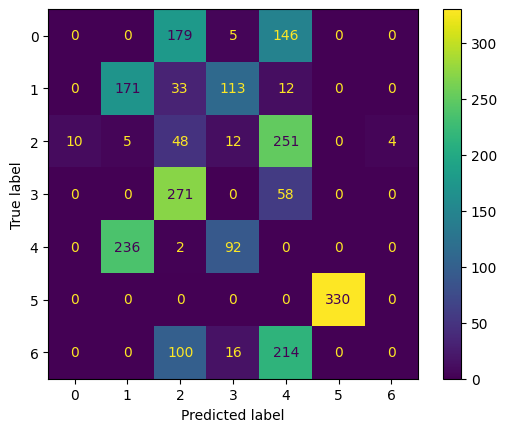

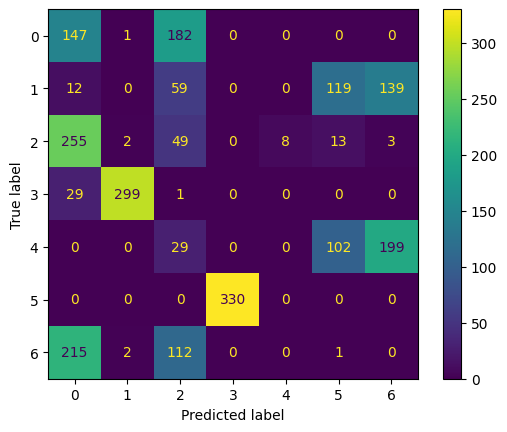

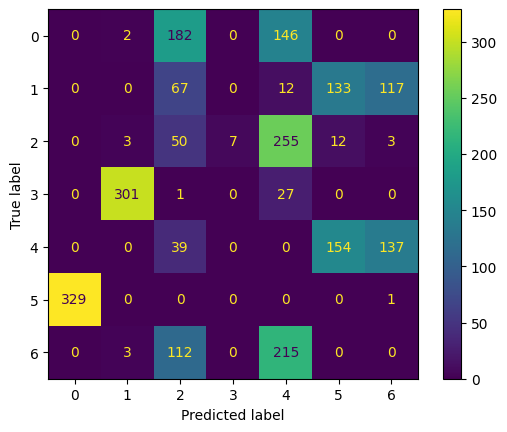

In [130]:
for dataset,mresults in best_results.items():
    print("Dataset: {0}\n".format(dataset))
    for m,results in mresults.items():
        mpc = modified_partition_coefficient(7,results[-1])
        pe = partition_entropy(results[1])
        c = build_crisp_partition(results[1])
        l = pd.from_dummies(c)
        y_true = L.to_numpy().flatten()
        y_pred = l.to_numpy().flatten()
        ari = adjusted_rand_score(y_true,y_pred)
        fm = f1_score(y_true,y_pred,average='micro')
        cm = confusion_matrix(y_true,y_pred)
        print("\tm: {0}\n\tJ: {1}\n\tMPF: {2}\n\tPE: {3}\n\tARI: {4}\n\tF-M: {5}\n".format(m,results[0][4][-1],mpc,pe,ari,fm))
        ConfusionMatrixDisplay(cm).plot()
    print("\n")
